In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [5]:
df.head(8)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
count_of_age = df.Age.value_counts().sort_values(ascending=False)
count_of_age[1:10]

Age
28    7
49    7
23    7
39    6
32    6
58    5
60    5
22    5
37    5
Name: count, dtype: int64

In [9]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.Sex,df.BP)

BP,HIGH,LOW,NORMAL
Sex,,,
F,38,28,30
M,39,36,29


In [11]:
pd.crosstab(df.Sex,df.Cholesterol)

Cholesterol,HIGH,NORMAL
Sex,,
F,49,47
M,54,50


In [12]:
df.Na_to_K.describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

In [13]:
pd.crosstab(df.Sex,df.Drug)

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [14]:
def grouper(df, idx, col): 
    if 10 <= df[col].loc[idx] <= 20:
        return '10-20'
    elif 20 <= df[col].loc[idx] <= 30:
        return '20-30'
    elif 30 <= df[col].loc[idx] <= 40:
        return '30-40'
    elif 40 <= df[col].loc[idx] <= 50:
        return '40-50'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    elif 60 <= df[col].loc[idx] <= 70:
        return '60-70'
    elif 70 <= df[col].loc[idx] <= 80:
        return '70-80'

In [15]:
Male = df.Age[df.Sex == 'M'].groupby(lambda x : grouper(df,x,'Age')).count()
Female = df.Age[df.Sex == 'F'].groupby(lambda x : grouper(df,x,'Age')).count()

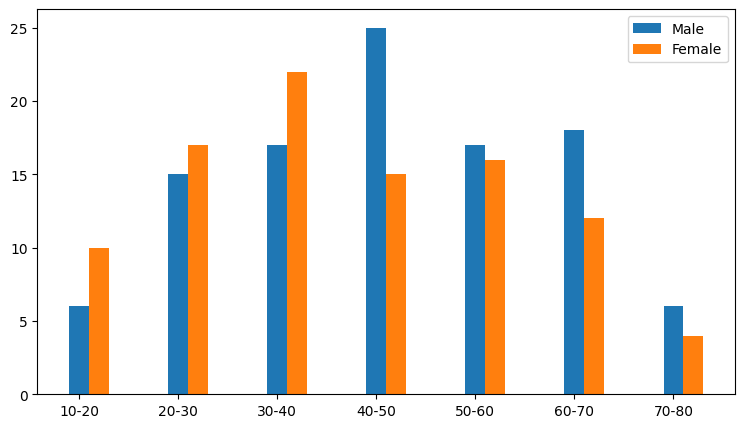

In [16]:
xpos = np.arange(len(Male.index))

plt.figure(figsize=(9,5))
plt.bar(xpos,Male,width=0.2,label = 'Male')
plt.bar(0.2+xpos,Female,width=0.2,label = 'Female')
plt.xticks(xpos,Male.index)
plt.legend()

Text(0.5, 1.0, 'Female')

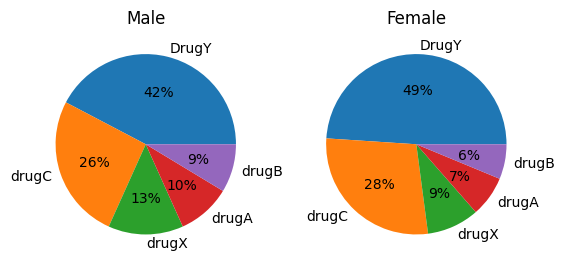

In [17]:
plt.subplot(1,2,1)
plt.pie(df.Drug[df.Sex == 'M'].value_counts(),labels=df.Drug.unique(),autopct='%0.0f%%')
plt.title('Male')
plt.subplot(1,2,2)
plt.pie(df.Drug[df.Sex == 'F'].value_counts(),labels=df.Drug.unique(),autopct='%0.0f%%')
plt.title('Female')

In [18]:
x = {'HIGH':'H','NORMAL':'N'}
df.Cholesterol = df.Cholesterol.replace(x)

In [19]:
sex = pd.get_dummies(df.Sex)
pressure = pd.get_dummies(df.BP)
Cholesterol = pd.get_dummies(df.Cholesterol)

In [20]:
drug = {'DrugY':0, 'drugC':1, 'drugX':2, 'drugA':3, 'drugB':4}
df.Drug = df.Drug.replace(drug)
df

/tmp/ipykernel_18/3161293176.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Drug = df.Drug.replace(drug)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,H,25.355,0
1,47,M,LOW,H,13.093,1
2,47,M,LOW,H,10.114,1
3,28,F,NORMAL,H,7.798,2
4,61,F,LOW,H,18.043,0
...,...,...,...,...,...,...
195,56,F,LOW,H,11.567,1
196,16,M,LOW,H,12.006,1
197,52,M,NORMAL,H,9.894,2
198,23,M,NORMAL,N,14.020,2


In [21]:
df = pd.concat([df,sex,pressure,Cholesterol],axis=1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,F,M,HIGH,LOW,NORMAL,H,N
0,23,F,HIGH,H,25.355,0,True,False,True,False,False,True,False
1,47,M,LOW,H,13.093,1,False,True,False,True,False,True,False
2,47,M,LOW,H,10.114,1,False,True,False,True,False,True,False
3,28,F,NORMAL,H,7.798,2,True,False,False,False,True,True,False
4,61,F,LOW,H,18.043,0,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,H,11.567,1,True,False,False,True,False,True,False
196,16,M,LOW,H,12.006,1,False,True,False,True,False,True,False
197,52,M,NORMAL,H,9.894,2,False,True,False,False,True,True,False
198,23,M,NORMAL,N,14.020,2,False,True,False,False,True,False,True


In [22]:
df = df.drop(columns=['Sex','BP','Cholesterol'])

In [23]:
x = df.drop(columns=['Drug'])
y = df.Drug

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 
log = LogisticRegression(max_iter=200)
log.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [25]:
log.score(x_train,y_train)

0.9875

In [26]:
log.score(x_test,y_test)

0.975